__<p style="font-size:180%;"> Pythonøving 7 - TKT4118/MEKT1101 Mekanikk 1</p>__

__Strekktest og DIC__

****

I denne oppgaven skal vi bestemme elastisitetsmodulen $E$ og tverrkontraksjonstallet $\nu$ fra testdata fra en strekktest utført på plastmaterialet HDPE (polyetylen med høy densitet). Dette er et meget duktilt plastmateriale.
Prøvestykket er flatt, og geometrien er vist i figuren under. Fra figuren kan dere finne tverrsnittsarealet $A_0$ i det smale området av prøvestykket, som ofte er kalt parallell-området. I den aktuelle testen ble tøyningene målt med en optisk metode: Før forsøket ble overflaten først sprayet hvit, og deretter påført en lett «dusj» med svart spray for danne et prikkemønster. Under forsøket ble det tatt digitale bilder med frekvens 1 Hz. 

Etterpå ble
bildene analysert med en DIC-programvare (DIC = Digital Image Correlation) som evaluerer
hvordan prikkene deformeres og forskyver seg fra bilde til bilde. Fra denne informasjonen kan
programmet bestemme både lengdetøyning $\varepsilon_L$ og tverrtøyning $\varepsilon_T$ .

***

## Noen forberedelser


Figurene under viser prøvestykkegeometrien og det malte prøvestykket under strekktesten.
<img width="800" src="http://folk.ntnu.no/einasc/TKT4116/Oving7/oving07Geometri.png"> 
<img width="800" src="http://folk.ntnu.no/einasc/TKT4116/Oving7/oving07DIC.png"> 

***

Måledataen leses fra tekstfilen \textit{testdata_HDPE.txt}. Filen inneholder data fra både testriggen (tid og kraft) og DIC-analysen (lengdetøyning og tverrtøyning). 

| tid [s] | Lengdetøning [-]  |  tverrtøyning [-] | Kraft [N]   | 
|-------|------|-------|------|
|0|	0.000000|	0.000000|	0.00|
|1|	0.000734|	-0.000257|	25.53|
|2|	0.001403|	-0.000679|	60.07|
|3|	0.002118|	-0.000931|	97.42|
|4|	0.003643|	-0.001510|	169.37|
|...|	...|	...|	...|
|...|	...|	...|	...|

<div class="alert alert-success">

Første oppgave er å lese inn og plotte resultatene fra testen. Legg merke til at dette materialet oppfører seg veldig annerledes fra metaller!

* Definer funksjonsbibliotek.
* Les tekstfilen fra serveren:"testdata_HDPE.txt".  
* Fordel de ulike kolonnene til egne variabler, e.g. tid = ..., lengdetøyning = ...
* Plot kraft, lengdetøyning og tverrtøyning mot tid i tre separate figurer.
***
</div>

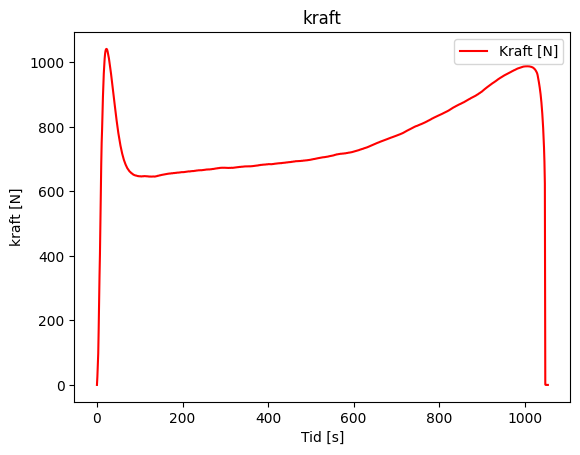

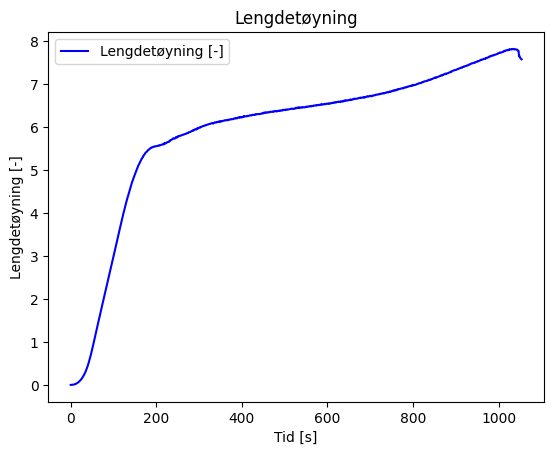

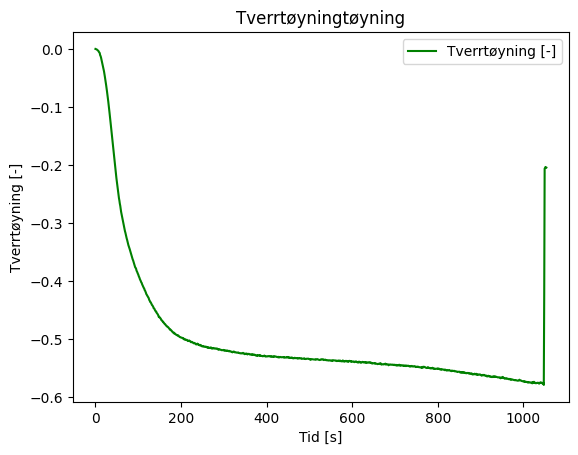

In [4]:
import numpy as np
import matplotlib.pyplot as plt

test_data = np.genfromtxt("testdata_HDPE(2).txt")

tid = test_data[:,0]
lengdetøyning = test_data[:,1]
tverrtøyning = test_data[:,2]
kraft = test_data[:,3]

plt.plot(tid, kraft, "r-", label = "Kraft [N]")
plt.xlabel("Tid [s]")
plt.ylabel("kraft [N]")
plt.title("kraft")
plt.legend()
plt.show()

plt.plot(tid, lengdetøyning, "b-", label = "Lengdetøyning [-]")
plt.xlabel("Tid [s]")
plt.ylabel("Lengdetøyning [-]")
plt.title("Lengdetøyning")
plt.legend()
plt.show()

plt.plot(tid, tverrtøyning, "g-", label = "Tverrtøyning [-]")
plt.xlabel("Tid [s]")
plt.ylabel("Tverrtøyning [-]")
plt.title("Tverrtøyningtøyning")
plt.legend()
plt.show()




Trykk for hjelp med å lese inn teksfilen.

***
## Spenning og tøyning
I dette faget har dere lært at (nominell) spenning er kraften i et tverrsnitt, delt på arealet det har før prøvestykket blir deformert:

\begin{equation*}
\sigma = \frac{F}{A_0}
\end{equation*}

<div class="alert alert-success">


Ettersom formålet med testdataene er å bestemme E-modul og tverrtøyning bør vi plotte dataene en mer hensiktsmessig form.

* Regn ut og plot spenningen mot lengdetøyningen.
* Plot tverrtøyning mot lengdetøyning.

***
</div>

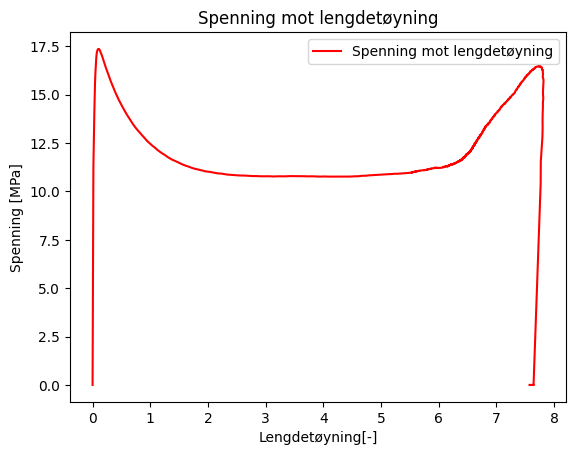

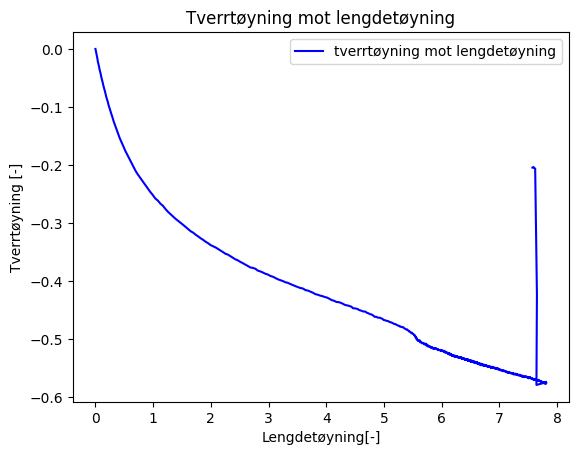

In [16]:
A_0 = 12 * 5
spenning = kraft / A_0

plt.plot(lengdetøyning, spenning, "r-", label = "Spenning mot lengdetøyning")
plt.xlabel("Lengdetøyning[-]")
plt.ylabel("Spenning [MPa]")
plt.title("Spenning mot lengdetøyning")
plt.legend()
plt.show()

plt.plot(lengdetøyning, tverrtøyning, "b-", label = "tverrtøyning mot lengdetøyning")
plt.xlabel("Lengdetøyning[-]")
plt.ylabel("Tverrtøyning [-]")
plt.title("Tverrtøyning mot lengdetøyning")
plt.legend()
plt.show()


***

## Elastisitetsmodul og tverrkontraksjonstall

Forholdet mellom spenning og lengdetøyning under lineær elastisk materialoppførsel er kjent som materialets elastisitetsmodul, $E$. Materialer oppfører seg sjeldent slik at det elastisk området er helt lineært, men ofte er det en god tilnærming.

\begin{equation*}
    E = \frac{\sigma}{\varepsilon_L}
\end{equation*}

Innenfor det elastiske området er det ofte tilsvarende et konstant forhold mellom lengdetøyning og tverrtøyning. Dette forholdet kalles tverrkontraksjonstallet $\nu$. 

\begin{equation*}
    \nu = -\frac{\varepsilon_T}{\varepsilon_L}
\end{equation*}


<div class="alert alert-success">


HDPE er som sagt et meget duktilt materiale, og så å si hele deformasjonsforløpet er plastisk. I mekanikk 1 begrenser vi oss til elastisk materialoppførsel, noe som vil si at vi bare skal fokusere på starten av testen, hvor det er en lineær (rettlinjet) sammenheng mellom $\sigma$ og $\varepsilon_L$. 

Ufør en lineær regresjon i det elastiske området for begge kurvene plottet i oppgave 2 (spenning-tøyning, tverrtøyning-lengdetøyning), og bruk resultatet til å finne elastisitetsmodul og tverrkontraksjonstallet.

Nyttige deloppgaver er:
* Lag nye plott som «zoomer» inn på den første delen av testen. Påvis at det elastiske området slutter ved en spenning på ca 11 MPa.

* Finn indeksen i testdataene som tilsvarer slutten på det elastiske området. 

* Utfør lineær regresjon i det elastiske området for begge kurver fra oppgave 2. Dette kan gjøres med samme metodikk som ble brukt i Pythonøving 5. Her er det derimot snakk om et førstegradspolynom som skal tilpasses. 

* Bestem elastisitetsmodul og tverrkontraksjonstall fra helningene til førstegradspolynomene.  

* Plot de lineære regresjonene sammen med plottene for spenning-tøyning, og tverrtøyning-lengdetøyning. 

Bruk 'print()' for å skive ut tallsvarene.

<br>


Bruk for eksempel den første kodecellen til beregninger, og den andre for plotting:

***
</div>

In [18]:
indeks = np.argmax(spenning>=11)


elastisk_lengde = lengdetøyning[0:indeks]
elastisk_tverr = lengdetøyning[0:indeks]
elastisk_spenning = lengdetøyning[0:indeks]

koeff_E = np.polyfit(elastisk_lengde, elastisk_spenning,1)
koeff_tverrkontraksjon = np.polyfit(elastisk_lengde,elastisk_tverr,1)

E_modul_funksjon = np.polyval(koeff_E , elastisk_lengde)
tverrkontrasksjon_funksjon = np.polyval(koeff_tverrkontraksjon, elastisk_tverr)

stigningstall = koeff_E[0]

E_modul = koeff_E[0]
tverrkontraksjonstall = koeff_tverrkontraksjon[0]

print("elastisitetsmodulen er" ,round(E_modul,2), "MPa" )
print("tverrkontraksjontallet er" ,round(tverrkontraksjonstall,2) )






elastisitetsmodulen er 1.0 MPa
tverrkontraksjontallet er 1.0


Trykk for noen hint:

In [ ]:
# Eksempel på hvordan man kan finne første indeks i et array hvor tilhørende verdi er større enn eller lik et tall feks. 2:
eksempel_array = np.array([0.0,1.0,2.0,3.0,4.0])
indeks = np.argmax(eksempel_array>=2.0)
print(indeks)

2


\underline{Repitisjon fra Pythonøving 5:} En kan bruke funksjonen `koeff = np.polyfit(x,y,polynomorden)` for å tilpasse et polynom til et datasett, hvor \textit{koeff} inneholder polynomets tilpassede koeffisienter. Et førstegrads polynom er på formen $y(x)= koeff[0] + koeff[1] \cdot x$, hvor koeff[0] er kurvens helning (feks. E-modul eller tverrkontraksjonstall). 

Videre kan `np.polyval(koeff, x)` brukes for å evaluere polynomet ved ønskede x-verdier. Det kan gjøre plottingen lettere. 

***

Trykk for et plotte-tips:

Et nyttig triks for å zoome på kurven er å bruke `plt.xlim("minimumverdi","maksverdi")`, og tilsvarende for y-aksen, for å se et mindre utsnitt av figuren.

***